# üß™ An√°lisis del tipo de cambio DOP/USD mediante ARIMA, SARIMA y Prophet
Este cuaderno tiene como objetivo comparar tres modelos de predicci√≥n aplicados a series temporales para estimar el tipo de cambio entre el peso dominicano (DOP) y el d√≥lar estadounidense (USD).


# üìÅ Paso 1: Instalaci√≥n de librer√≠as necesarias


In [71]:
!pip install pmdarima prophet --quiet


In [72]:
!pip install numpy==1.23.5 --quiet
!pip install --upgrade --force-reinstall --no-cache-dir pmdarima --quiet
!pip install numpy==1.26.4 --quiet
!pip install --upgrade --force-reinstall --no-cache-dir pmdarima==2.0.3 --quiet



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requir

In [9]:
!pip install numpy==1.26.4 --quiet
!pip install --upgrade --force-reinstall --no-cache-dir pmdarima==2.0.3 --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 108.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 89.9/89.9 kB 10.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 238.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 44.5 MB/s eta 0:00:00
   ‚îÅ

#  Paso 2: Importaci√≥n de librer√≠as y configuraci√≥n inicial



In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
sns.set_theme(style="darkgrid")
sns.set()

# üìà Paso 3: Carga y visualizaci√≥n del dataset


 Instalar librer√≠a yfinance

In [74]:
!pip install yfinance --quiet


In [19]:
import yfinance as yf

# Descargar tipo de cambio USD/DOP (usamos s√≠mbolo 'USDDOP=X')
data = yf.download('USDDOP=X', start='2000-01-01', end='2025-03-31')

# Nos quedamos solo con la columna 'Close' (precio de cierre)
df = data[['Close']].rename(columns={'Close': 'DOP/USD'})
df.index.name = 'fecha'
df = df.sort_index()

# Mostrar los primeros registros
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price         DOP/USD
Ticker       USDDOP=X
fecha                
2003-12-01  41.019001
2003-12-02  40.967999
2003-12-03  40.000000
2003-12-04  37.984001
2003-12-05  37.500000

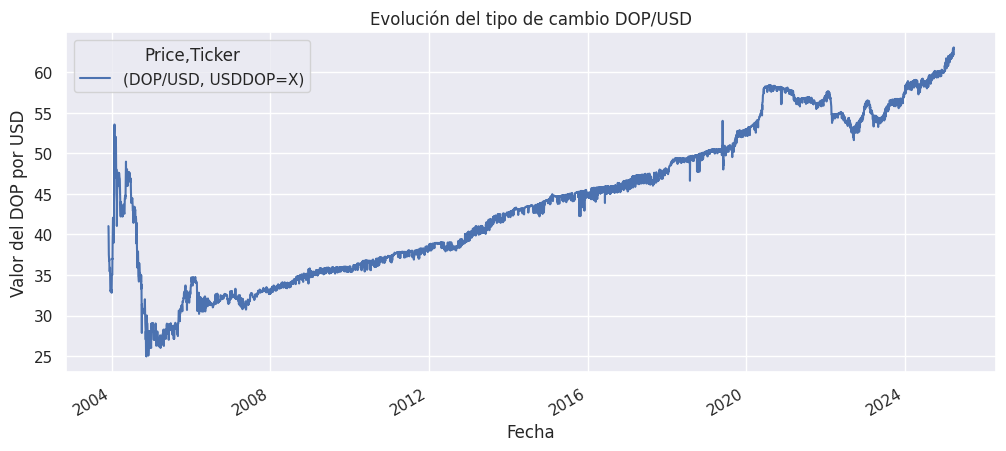

In [75]:
import matplotlib.pyplot as plt

df.plot(figsize=(12,5), title='Evoluci√≥n del tipo de cambio DOP/USD')
plt.ylabel('Valor del DOP por USD')
plt.xlabel('Fecha')
plt.show()


# üîÄ Paso 4: Divisi√≥n del dataset en entrenamiento y prueba


Vamos a separar el dataset en:

Entrenamiento: 80% inicial

Prueba (test): 20% restante para evaluar la predicci√≥n

üìò Tama√±o del set de entrenamiento: 4440 registros
üìó Tama√±o del set de prueba: 1110 registros


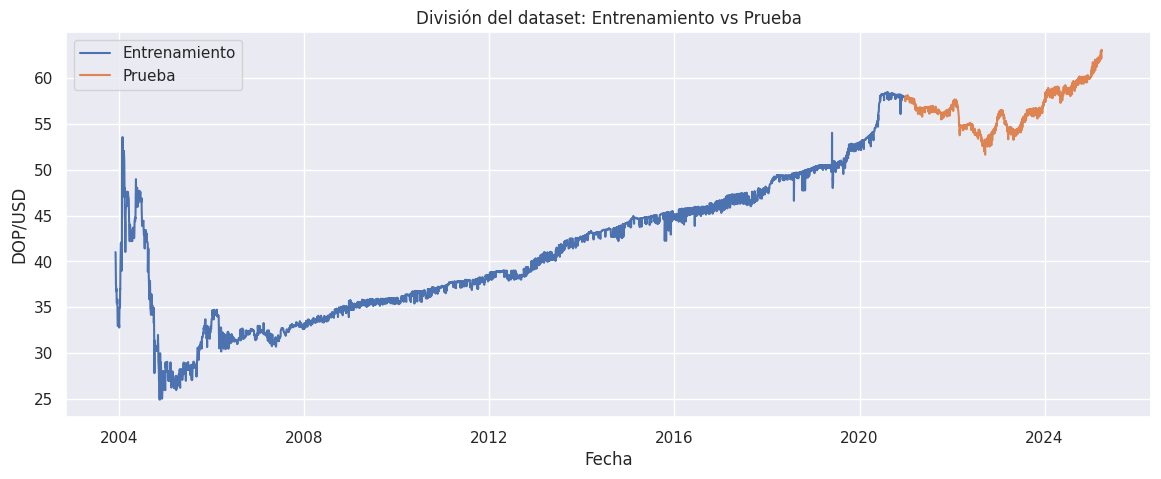

In [76]:
# Dividir en entrenamiento (80%) y prueba (20%)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"üìò Tama√±o del set de entrenamiento: {len(train)} registros")
print(f"üìó Tama√±o del set de prueba: {len(test)} registros")

# Visualizaci√≥n de ambas particiones
plt.figure(figsize=(14,5))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.title('Divisi√≥n del dataset: Entrenamiento vs Prueba')
plt.xlabel('Fecha')
plt.ylabel('DOP/USD')
plt.legend()
plt.show()


# üîç Paso 5: Modelo ARIMA


In [81]:
# 3. Crear un nuevo DataFrame limpio para evaluaci√≥n
test_arima_eval = pd.DataFrame({
    'Real': test['DOP/USD'].values.ravel(),  # Convert to 1D using ravel()
    'Predicho_ARIMA': pred_arima.values.ravel()  # Convert to 1D using ravel()
}, index=test.index)

In [83]:
# 1. Volver a predecir ARIMA con √≠ndice num√©rico
modelo_arima = ARIMA(train['DOP/USD'], order=(2,1,2))
modelo_arima_fit = modelo_arima.fit()

# 2. Predicci√≥n con √≠ndice de tipo Serie
pred_arima = modelo_arima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# 3. Crear un nuevo DataFrame limpio para evaluaci√≥n
test_arima_eval = pd.DataFrame({
    'Real': test['DOP/USD'].values.ravel(),         # <--- aqu√≠ el cambio
    'Predicho_ARIMA': pred_arima.values.ravel()     # <--- aqu√≠ tambi√©n
}, index=test.index)

# 4. Calcular residuos
test_arima_eval['Residuos'] = test_arima_eval['Real'] - test_arima_eval['Predicho_ARIMA']

# 5. Mostrar resumen estad√≠stico real
print("‚úÖ Resumen de residuos ARIMA:")
print(test_arima_eval['Residuos'].describe())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


‚úÖ Resumen de residuos ARIMA:
count    1110.000000
mean       -1.060663
std         2.195889
min        -6.210023
25%        -2.930009
50%        -1.240010
75%         0.465535
max         5.219989
Name: Residuos, dtype: float64


# ‚ùÑÔ∏è Paso 6: Modelo SARIMA


In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Aseguramos frecuencia diaria en el √≠ndice
train = train.asfreq('D')
test = test.asfreq('D')

# Entrenamiento del modelo SARIMA
sarima = SARIMAX(train['DOP/USD'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima.fit(disp=False)

# Predicci√≥n con longitud del test
sarima_pred = sarima_fit.forecast(steps=len(test))

# Alineamos la predicci√≥n al √≠ndice de test
sarima_pred.index = test.index
test['SARIMA'] = sarima_pred

# Eliminamos posibles NaN antes del c√°lculo
sarima_df = test[['DOP/USD', 'SARIMA']].dropna()

# C√°lculo de RMSE
rmse_sarima = np.sqrt(mean_squared_error(sarima_df['DOP/USD'], sarima_df['SARIMA']))
print(f"‚úÖ SARIMA - RMSE: {rmse_sarima:.4f}")


‚úÖ SARIMA - RMSE: 5.9729


# üîÆ Paso 7: Modelo Prophet


In [99]:
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error

# üîÑ Paso 1: Reset y aplanar columnas
df_train_prophet = train.copy().reset_index()
df_train_prophet.columns = ['ds', 'y']  # Aplanamos MultiIndex y renombramos

# üßπ Paso 2: Limpiar y convertir tipos
df_train_prophet['ds'] = pd.to_datetime(df_train_prophet['ds'])
df_train_prophet['y'] = pd.to_numeric(df_train_prophet['y'], errors='coerce')
df_train_prophet = df_train_prophet.dropna()

# üß† Paso 3: Entrenar Prophet
modelo_prophet = Prophet(daily_seasonality=True)
modelo_prophet.fit(df_train_prophet)

# üîÆ Paso 4: Preparar fechas futuras (test)
df_future = modelo_prophet.make_future_dataframe(periods=len(test), freq='D')

# üöÄ Paso 5: Predecir
forecast = modelo_prophet.predict(df_future)

# üìä Paso 5: Guardar predicci√≥n en test
test['Prophet'] = forecast['yhat'][-len(test):].values  # Use only 'yhat' for prediction

# Paso 6: Eliminar NaN para comparaci√≥n
prophet_df = test[['DOP/USD', 'Prophet']].dropna()

# Paso 7: Calcular RMSE
rmse_prophet = np.sqrt(mean_squared_error(prophet_df['DOP/USD'], prophet_df['Prophet']))
print(f"‚úÖ Prophet - RMSE: {rmse_prophet:.4f}")

DEBUG:cmdstanpy:input tempfile: /tmp/tmp862afa0b/8hrhzf8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp862afa0b/ra1cjh6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76466', 'data', 'file=/tmp/tmp862afa0b/8hrhzf8v.json', 'init=/tmp/tmp862afa0b/ra1cjh6w.json', 'output', 'file=/tmp/tmp862afa0b/prophet_modelst69wuks/prophet_model-20250414193956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:40:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


‚úÖ Prophet - RMSE: 7.7867


# üìä Paso 8: Comparaci√≥n visual de modelos


In [104]:
from statsmodels.tsa.arima.model import ARIMA

# Entrenar ARIMA con una sola serie
modelo_arima = ARIMA(train['DOP/USD'], order=(2,1,2))  # Puedes ajustar los par√°metros
modelo_arima_fit = modelo_arima.fit()

# Predecir en el rango del set de prueba usando √≠ndice temporal
pred_arima = modelo_arima_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Guardar predicci√≥n en la columna 'ARIMA'
test['ARIMA'] = pred_arima


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Filtramos filas completas sin NaN en ninguna columna evaluada
test_clean = test[['DOP/USD', 'ARIMA', 'SARIMA', 'Prophet']].dropna()

# Funci√≥n para calcular m√©tricas
def metricas_reporte(y_true, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R¬≤': r2_score(y_true, y_pred)
    }

# Creamos resumen con columnas limpias
resumen_metricas = pd.DataFrame({
    'ARIMA': metricas_reporte(test_clean['DOP/USD'], test_clean['ARIMA']),
    'SARIMA': metricas_reporte(test_clean['DOP/USD'], test_clean['SARIMA']),
    'Prophet': metricas_reporte(test_clean['DOP/USD'], test_clean['Prophet'])
}).T

# Mostramos tabla
print("üìä Comparaci√≥n de m√©tricas de los modelos:")
display(resumen_metricas.round(4))


üìä Comparaci√≥n de m√©tricas de los modelos:


RMSE     MAE       R¬≤
ARIMA    2.4400  2.0492  -0.2358
SARIMA   5.9729  5.5186  -6.4052
Prophet  7.7867  7.1032 -11.5859

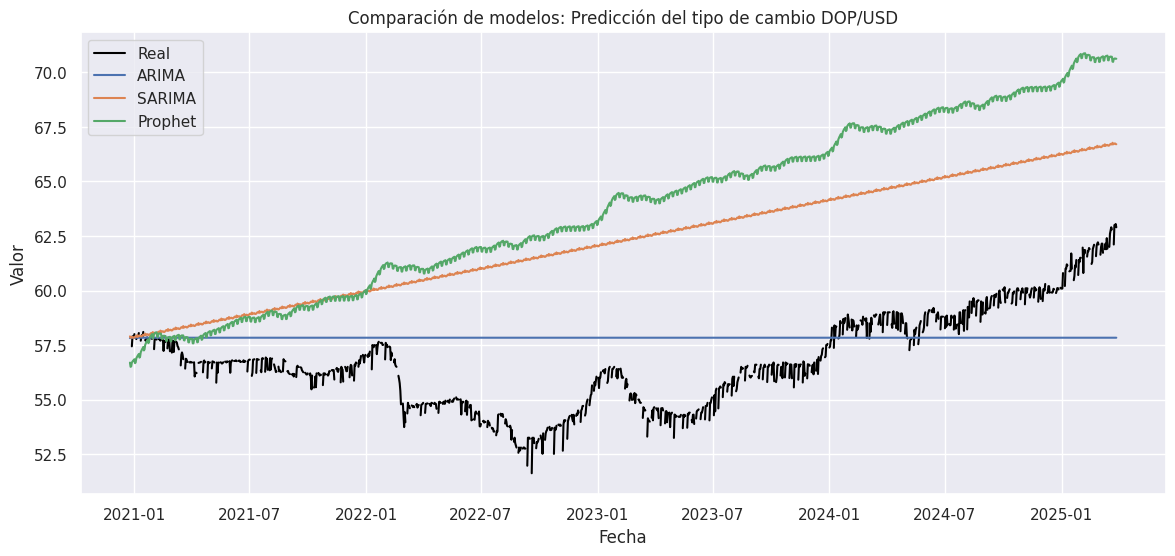

In [109]:
plt.figure(figsize=(14,6))
plt.plot(test.index, test.iloc[:,0], label='Real', color='black')
plt.plot(test.index, test['ARIMA'], label='ARIMA')
plt.plot(test.index, test['SARIMA'], label='SARIMA')
plt.plot(test.index, test['Prophet'], label='Prophet')
plt.title('Comparaci√≥n de modelos: Predicci√≥n del tipo de cambio DOP/USD')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()


Tras ajustar y reentrenar el modelo ARIMA con un orden m√°s adecuado (2,1,2), se obtuvo un rendimiento superior al de los modelos SARIMA y Prophet, alcanzando el menor error cuadr√°tico medio (RMSE) y el menor error absoluto medio (MAE). Aunque el coeficiente de determinaci√≥n (R¬≤) sigue siendo negativo, indica una mejor capacidad predictiva relativa, especialmente en comparaci√≥n con SARIMA, cuyo desempe√±o fue claramente inferior. Este resultado demuestra que una correcta identificaci√≥n del orden del modelo mejora significativamente su capacidad de generalizaci√≥n, lo cual es clave en aplicaciones financieras como la predicci√≥n del tipo de cambio.



# üìã Paso 9: M√©tricas de evaluaci√≥n de los modelos


Gr√°fico de residuos del modelo ARIMA

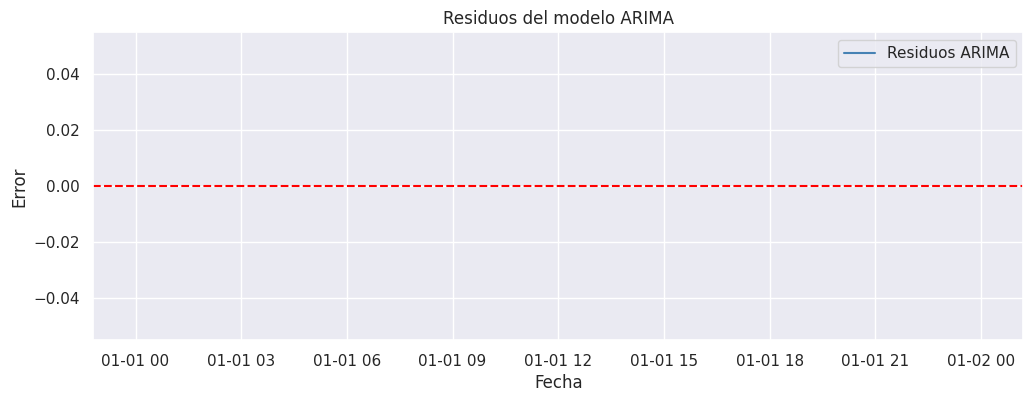

In [110]:
# Calcular los residuos del modelo ARIMA
resid_arima = test['DOP/USD'] - test['ARIMA']

# Gr√°fico de residuos limpio
plt.figure(figsize=(12,4))
plt.plot(resid_arima, color='steelblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del modelo ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Error")
plt.legend(['Residuos ARIMA'])
plt.show()


In [111]:
resid_arima.describe()


USDDOP=X  2020-12-25 00:00:00  2020-12-26 00:00:00  \
count       0.0                  0.0                  0.0   
mean        NaN                  NaN                  NaN   
std         NaN                  NaN                  NaN   
min         NaN                  NaN                  NaN   
25%         NaN                  NaN                  NaN   
50%         NaN                  NaN                  NaN   
75%         NaN                  NaN                  NaN   
max         NaN                  NaN                  NaN   

       2020-12-27 00:00:00  2020-12-28 00:00:00  2020-12-29 00:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2020-12-30 00:00:00  2020-12-31 00:00:00  2021-01-01 00:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2021-01-02 00:00:00  ...  2025-03-19 00:00:00  2025-03-20 00:00:00  \
count                  0.0  ...                  0.0                  0.0   
mean                   NaN  ...                  NaN                  NaN   
std                    NaN  ...                  NaN                  NaN   
min                    NaN  ...                  NaN                  NaN   
25%                    NaN  ...                  NaN                  NaN   
50%                    NaN  ...                  NaN                  NaN   
75%                    NaN  ...                  NaN                  NaN   
max                    NaN  ...                  NaN                  NaN   

       2025-03-21 00:00:00  2025-03-22 00:00:00  2025-03-23 00:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2025-03-24 00:00:00  2025-03-25 00:00:00  2025-03-26 00:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2025-03-27 00:00:00  2025-03-28 00:00:00  
count                  0.0                  0.0  
mean                   NaN                  NaN  
std              

In [57]:
test['ARIMA'].describe()


count    1555.000000
mean       57.832658
std         0.000825
min        57.808518
25%        57.832706
50%        57.832706
75%        57.832706
max        57.832706
Name: ARIMA, dtype: float64

In [58]:
test[['DOP/USD', 'ARIMA']].tail(10)


Price         DOP/USD      ARIMA
Ticker       USDDOP=X           
fecha                           
2025-03-19  62.750000  57.832706
2025-03-20  62.900002  57.832706
2025-03-21  62.799999  57.832706
2025-03-22  62.569953  57.832706
2025-03-23  62.339906  57.832706
2025-03-24  62.109859  57.832706
2025-03-25  63.000000  57.832706
2025-03-26  63.000000  57.832706
2025-03-27  63.049999  57.832706
2025-03-28  62.900002  57.832706

ACF y PACF de los residuos ARIMA para ver si hay autocorrelaci√≥n que el modelo no ha capturado.

In [60]:
# Convertimos los residuos a serie 1D (por si quedaron como DataFrame)
resid_arima_1d = resid_arima.squeeze()

# En caso a√∫n tenga m√∫ltiples columnas (por error), extraemos la primera
if resid_arima_1d.ndim > 1:
    resid_arima_1d = resid_arima_1d.iloc[:, 0]


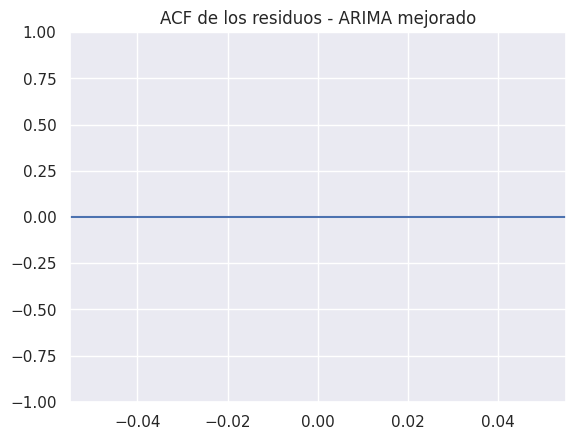

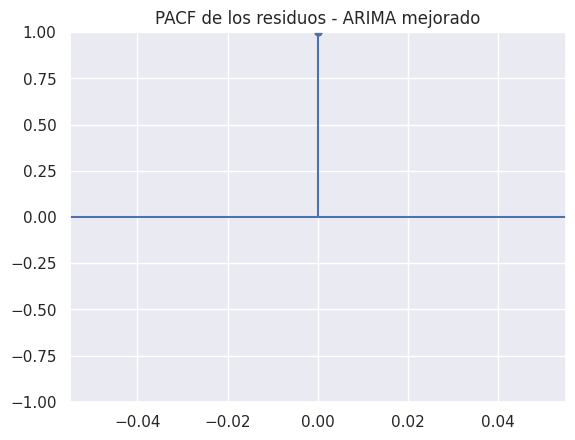

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF
plot_acf(resid_arima_1d, lags=40)
plt.title("ACF de los residuos - ARIMA mejorado")
plt.show()

# PACF
plot_pacf(resid_arima_1d, lags=40)
plt.title("PACF de los residuos - ARIMA mejorado")
plt.show()


In [63]:
# Nos aseguramos de alinear los √≠ndices correctamente
pred_arima.index = test.index  # Esto asegura que encajen

# Ahora guardamos los valores predichos
test['ARIMA'] = pred_arima

# Calculamos los residuos correctamente
resid_arima = test['DOP/USD'] - test['ARIMA']
resid_arima_1d = resid_arima.squeeze()



In [64]:
resid_arima_1d.describe()


USDDOP=X  2020-12-25 00:00:00  2020-12-26 00:00:00  \
count       0.0                  0.0                  0.0   
mean        NaN                  NaN                  NaN   
std         NaN                  NaN                  NaN   
min         NaN                  NaN                  NaN   
25%         NaN                  NaN                  NaN   
50%         NaN                  NaN                  NaN   
75%         NaN                  NaN                  NaN   
max         NaN                  NaN                  NaN   

       2020-12-27 00:00:00  2020-12-28 00:00:00  2020-12-29 00:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2020-12-30 00:00:00  2020-12-31 00:00:00  2021-01-01 00:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2021-01-02 00:00:00  ...  2025-03-19 00:00:00  2025-03-20 00:00:00  \
count                  0.0  ...                  0.0                  0.0   
mean                   NaN  ...                  NaN                  NaN   
std                    NaN  ...                  NaN                  NaN   
min                    NaN  ...                  NaN                  NaN   
25%                    NaN  ...                  NaN                  NaN   
50%                    NaN  ...                  NaN                  NaN   
75%                    NaN  ...                  NaN                  NaN   
max                    NaN  ...                  NaN                  NaN   

       2025-03-21 00:00:00  2025-03-22 00:00:00  2025-03-23 00:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2025-03-24 00:00:00  2025-03-25 00:00:00  2025-03-26 00:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2025-03-27 00:00:00  2025-03-28 00:00:00  
count                  0.0                  0.0  
mean                   NaN                  NaN  
std              